In [131]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [132]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [180]:
data=pd.read_csv("Concrete_Data - Sheet1.csv")
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [219]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [181]:
new_column_names = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Compressive Strength'
}
data.rename(columns=new_column_names, inplace=True)
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [182]:
SS = StandardScaler()

In [183]:
transformed_data = SS.fit_transform(data)
transformed_data

array([[ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  2.64540763],
       [ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  1.56142148],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -2.24091709,
         3.55306569,  0.26662698],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ...,  0.0801067 ,
        -0.27973311, -0.72572939],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.19116644,
        -0.27973311, -0.18253855],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -0.15074782,
        -0.27973311, -0.20469738]])

In [184]:
df=pd.DataFrame(transformed_data)
df.head()

,0,1,2,3,4,5,6,7,8
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [185]:
X = df.iloc[:,:8]
X.head()

,0,1,2,3,4,5,6,7
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487


In [186]:
y=df.iloc[:,-1:]
y.head()

,8
0,2.645408
1,1.561421
2,0.266627
3,0.313340
4,0.507979


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [189]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((824, 8), (824, 1), (206, 8), (206, 1))

In [190]:
X_train.head()

,0,1,2,3,4,5,6,7
1000,-1.333273,1.074987,1.180498,-0.377967,0.786365,-1.162164,0.146243,-0.279733
674,-0.432412,0.963667,-0.847144,0.488793,-1.039143,-0.004104,-0.305483,-0.675683
821,0.390904,-0.856888,-0.847144,1.004164,-1.039143,0.013910,0.329679,-0.501465
712,-0.853644,2.482729,-0.847144,0.488793,-1.039143,-0.554826,-0.717277,-0.612331
765,0.994031,-0.856888,-0.847144,0.207681,-1.039143,-0.089028,-0.132030,-0.612331


In [191]:
y_train.head()

,8
1000,0.526544
674,-1.332402
821,-0.901203
712,-0.858682
765,-0.754476


Linear regression using Least Squares Method

In [192]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [194]:
X_test

,0,1,2,3,4,5,6,7
808,-0.279237,-0.856888,-0.847144,0.207681,-1.039143,1.776735,0.130021,-0.612331
281,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,-0.279733
243,-0.492725,-0.856888,1.000715,0.638719,-0.017528,0.710033,-0.199414,0.860604
589,0.555567,-0.856888,-0.847144,0.193626,-1.039143,1.238880,-0.240594,-0.279733
283,-0.284981,-0.856888,1.002278,0.324811,0.032715,0.713893,-0.198167,0.860604
...,...,...,...,...,...,...,...,...
532,0.074981,-0.856888,-0.847144,0.488793,-1.039143,-0.768423,1.518892,0.702224
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
15,0.946164,-0.856888,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,0.702224
470,-0.284981,-0.856888,1.002278,0.530959,-0.067772,0.909477,-0.240594,0.860604


In [195]:
y_pred = LR.predict(X_test)
y_pred
#predict on test set

array([[-1.23899509],
       [-0.48328171],
       [-0.18072849],
       [-0.55100856],
       [ 0.03215651],
       [ 1.6526855 ],
       [-1.13120582],
       [-0.92655033],
       [ 0.97213638],
       [ 0.77851962],
       [ 0.50379667],
       [-0.68224708],
       [ 1.11646514],
       [-0.88260905],
       [-0.45402384],
       [ 0.43197328],
       [ 0.44532255],
       [-0.8656567 ],
       [ 0.44174699],
       [ 2.10369395],
       [ 1.46724949],
       [-0.90043394],
       [ 0.83652322],
       [-0.85122147],
       [-0.88146992],
       [-0.22748876],
       [-0.14651852],
       [-0.35928522],
       [-0.50825206],
       [ 0.31673605],
       [-1.43987325],
       [-0.7925508 ],
       [ 0.02027733],
       [-0.46538581],
       [ 1.92091607],
       [ 0.98358834],
       [-0.30282727],
       [-0.63479847],
       [ 0.47384207],
       [ 0.85997762],
       [ 0.66708332],
       [ 0.87874372],
       [ 0.23038448],
       [ 0.02013458],
       [-0.59564748],
       [ 1

In [196]:
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mse

0.45244536778771194

In [198]:
r2 = r2_score(y_test, y_pred)
r2

0.5179120685190273

In [199]:
print(f'Least Squares Method:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Least Squares Method:
Mean Squared Error: 0.45
R-squared: 0.52


# Check assumptions Least Square

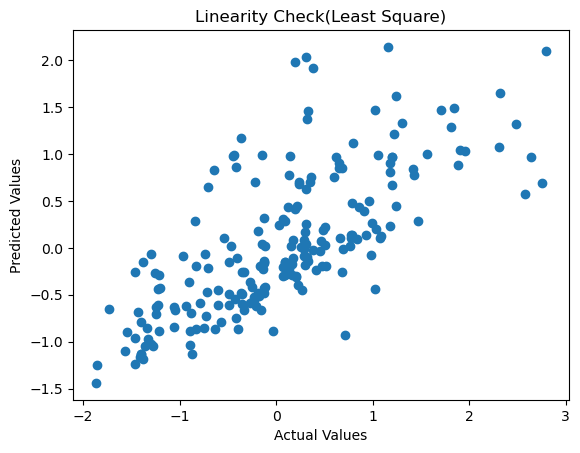

In [220]:
# Assumption 1: Linearity
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linearity Check(Least Square)")
plt.show()

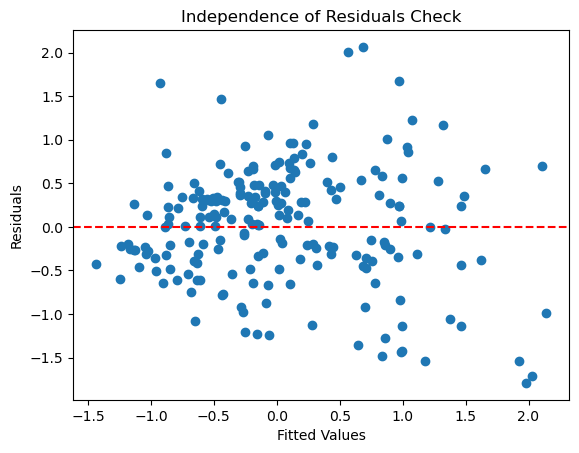

In [97]:
# Assumption 2: Independence of Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Independence of Residuals Check")
plt.show()

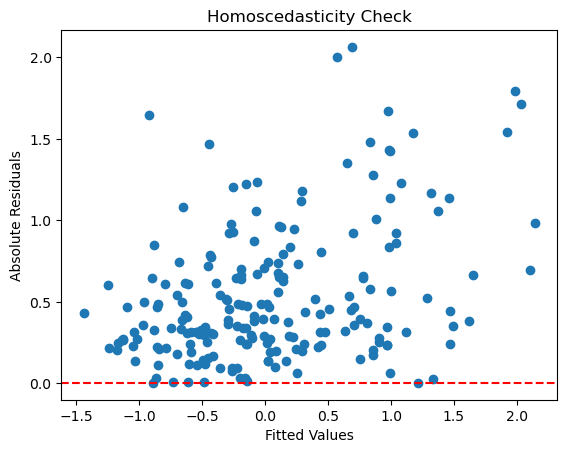

In [98]:
# Assumption 3: Homoscedasticity
plt.scatter(y_pred, np.abs(residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Absolute Residuals")
plt.title("Homoscedasticity Check")
plt.show()

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multicollinearity using VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_result = calculate_vif(X_train)
print(vif_result)

   Variable       VIF
0         0  7.216203
1         1  6.916905
2         2  6.041088
3         3  6.653232
4         4  2.944997
5         5  5.133328
6         6  6.681191
7         7  1.105561


In [160]:
import statsmodels.api as sm

In [200]:
# Ordinary Least Squares (OLS) Regression Results
a=sm.OLS(y_train,X_train).fit()
print(a.summary())

                                 OLS Regression Results                                
Dep. Variable:                      8   R-squared (uncentered):                   0.635
Model:                            OLS   Adj. R-squared (uncentered):              0.632
Method:                 Least Squares   F-statistic:                              177.7
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                   5.34e-173
Time:                        13:15:13   Log-Likelihood:                         -759.52
No. Observations:                 824   AIC:                                      1535.
Df Residuals:                     816   BIC:                                      1573.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Gradient Descent

In [201]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [202]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [203]:
# Standardize features for better convergence
sgd=SGDRegressor()

In [204]:
#hyperparameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
         'eta0':[0.1,0.2,0.3,0.5],
         'loss':['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
         'learning_rate':['constant','invscaling','adaptive']}

In [205]:
grid_search=GridSearchCV(sgd,param_grid,cv=8)

In [206]:
X_train

,0,1,2,3,4,5,6,7
1000,-1.333273,1.074987,1.180498,-0.377967,0.786365,-1.162164,0.146243,-0.279733
674,-0.432412,0.963667,-0.847144,0.488793,-1.039143,-0.004104,-0.305483,-0.675683
821,0.390904,-0.856888,-0.847144,1.004164,-1.039143,0.013910,0.329679,-0.501465
712,-0.853644,2.482729,-0.847144,0.488793,-1.039143,-0.554826,-0.717277,-0.612331
765,0.994031,-0.856888,-0.847144,0.207681,-1.039143,-0.089028,-0.132030,-0.612331
...,...,...,...,...,...,...,...,...
626,-0.432412,-0.856888,-0.847144,0.535645,-1.039143,-0.063294,1.390362,-0.612331
1016,-1.119785,-0.856888,2.281084,-0.017208,1.071077,-1.590646,0.903696,-0.279733
165,1.376969,0.375755,-0.847144,-1.413395,2.075944,-0.475048,0.375850,0.718062
7,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.279733


In [207]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=SGDRegressor(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
                         'eta0': [0.1, 0.2, 0.3, 0.5],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive']})

In [213]:
y_pred_SD = grid_search.predict(X_test)

In [214]:
best_params = grid_search.best_params_
best_params

{'alpha': 0.01,
 'eta0': 0.2,
 'learning_rate': 'adaptive',
 'loss': 'squared_epsilon_insensitive'}

In [233]:
mse2=mean_squared_error(y_test,y_pred_SD)
mse2

0.44643809955016167

In [234]:
r2_SD=r2_score(y_test,y_pred_SD)
r2_SD

0.5243129109735594

In [235]:
print(f'Least Squares Method:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2_SD:.2f}')

Least Squares Method:
Mean Squared Error: 0.45
R-squared: 0.52


# Check assumptions Gradient Descent

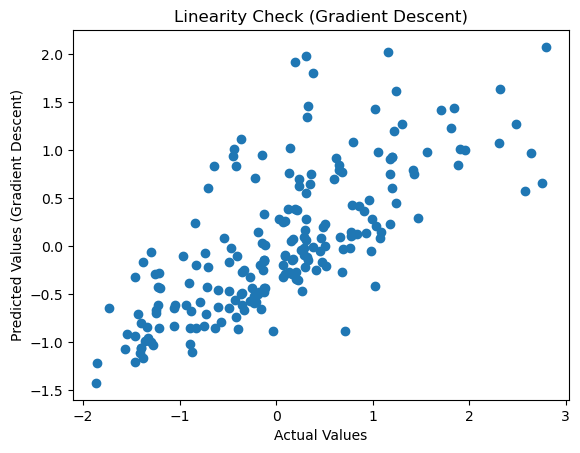

In [221]:
# 1. Linearity
plt.scatter(y_test, y_pred_SD)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Gradient Descent)")
plt.title("Linearity Check (Gradient Descent)")
plt.show()

In [228]:
print(y_test.shape)
print(y_pred_SD.shape)

(206, 1)
(206,)


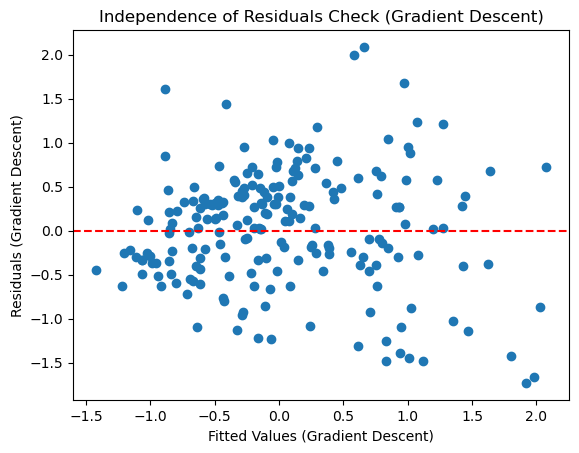

In [231]:
# 2. Independence of Residuals
residuals_SD = y_test.values.flatten() - y_pred_SD

plt.scatter(y_pred_SD, residuals_SD)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Gradient Descent)")
plt.ylabel("Residuals (Gradient Descent)")
plt.title("Independence of Residuals Check (Gradient Descent)")
plt.show()

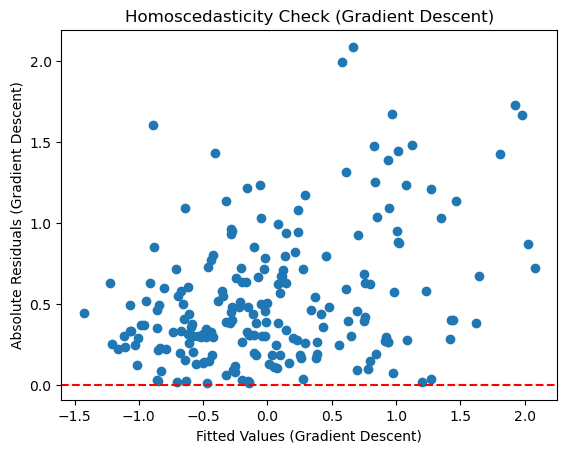

In [232]:
# 3. Homoscedasticity
plt.scatter(y_pred_SD, np.abs(residuals_SD))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Gradient Descent)")
plt.ylabel("Absolute Residuals (Gradient Descent)")
plt.title("Homoscedasticity Check (Gradient Descent)")
plt.show()